In [1]:
#NOTE: Only works for relatively small phase differences

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from nsdmd import utils
from nsdmd import nsdmd

In [2]:
t_step = 0.001
f1 = 17
t1 = np.arange(2000)
f2 = 30
t2 = np.arange(2000)

coupling = np.ones(3*len(t1))
for i in range(0,len(coupling),200):
    coupling[i:i+100] = 0
coupling[3000:]=0
net1, F1_true, c1 = utils.make_network(f1, len(t1), \
                    np.hstack([i*np.ones(50) for i in [1,2]]), \
                    np.hstack([i*np.ones(10, dtype=int) for i in [int(j) for j in np.linspace(-25,25,10)]]),\
                    t_step,
                    coupling=coupling)
net2, F2_true, c2 = utils.make_network(f2, len(t2), \
                    np.hstack([i*np.ones(50) for i in [2,1]]), \
                    np.hstack([i*np.ones(10, dtype=int) for i in [int(j) for j in np.linspace(-10,50,10)]]),
                    t_step)
x = np.zeros((100,2000))
x[:,t1] += net1
x[:,t2] += net2
x = utils.add_noise(x, std=0.1)
t = np.arange(x.shape[1]) * t_step

Text(0, 0.5, 'Channel')

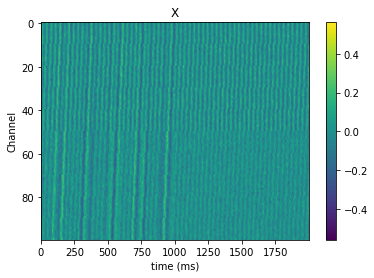

In [3]:
plt.imshow(x, aspect='auto')
plt.colorbar()
plt.title('X')
plt.xlabel('time (ms)')
plt.ylabel('Channel')

Text(0, 0.5, 'Amp')

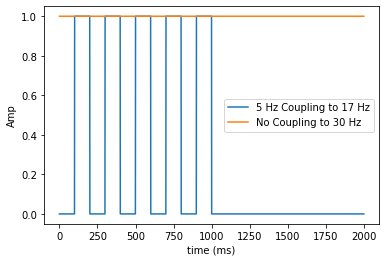

In [4]:
plt.plot(c1, label='5 Hz Coupling to '+str(f1)+' Hz')
plt.plot(c2, label='No Coupling to '+str(f2)+' Hz')
plt.legend()
plt.xlabel('time (ms)')
plt.ylabel('Amp')

In [5]:
model = nsdmd.NSDMD(opt_rank=4, sim_thresh_phi_amp=0.95, grad_N=3, grad_fit_coupling=True)
model.fit_opt(x, t)

In [7]:
model.fit_reduction(x, len(t), t_step)

Text(0, 0.5, 'Cosine Distance')

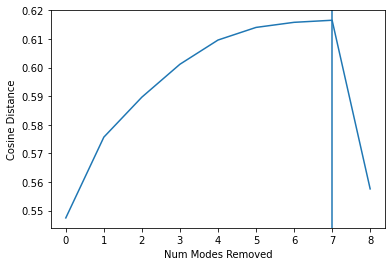

In [8]:
plt.plot(model.errors_)
plt.axvline(7)
plt.xlabel('Num Modes Removed')
plt.ylabel('Cosine Distance')

In [9]:
model.fit_f(x, len(t), t_step, 7)

In [11]:
freq_hat, phi_hat = model.get_freq_and_phi(len(t), t_step)

In [14]:
model.freq_mean_[1]

array([30.00230054, 16.93845381])

Text(0, 0.5, 'chan')

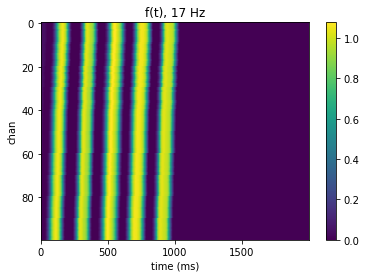

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(model.f_hat_[1], aspect='auto')
fig.colorbar(cax)
ax.xaxis.set_ticks_position('bottom')
plt.title('f(t), ' + str(round(model.freq_mean_[1])) + ' Hz')
plt.xlabel('time (ms)')
plt.ylabel('chan')

Text(0, 0.5, 'chan')

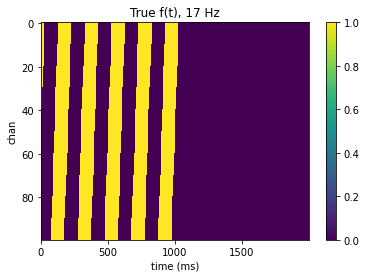

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(F1_true, aspect='auto')
fig.colorbar(cax)
ax.xaxis.set_ticks_position('bottom')
plt.title('True f(t), ' + str(f1) + ' Hz')
plt.xlabel('time (ms)')
plt.ylabel('chan')

Text(0, 0.5, 'chan')

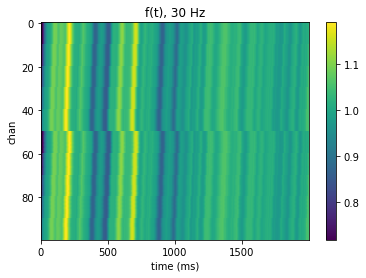

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(model.f_hat_[0], aspect='auto')
fig.colorbar(cax)
ax.xaxis.set_ticks_position('bottom')
plt.title('f(t), ' + str(round(model.freq_mean_[0])) + ' Hz')
plt.xlabel('time (ms)')
plt.ylabel('chan')

Text(0, 0.5, 'chan')

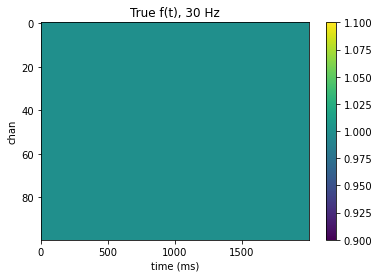

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(F2_true, aspect='auto')
fig.colorbar(cax)
ax.xaxis.set_ticks_position('bottom')
plt.title('True f(t), ' + str(f2) + ' Hz')
plt.xlabel('time (ms)')
plt.ylabel('chan')

Text(0, 0.5, 'f(t)')

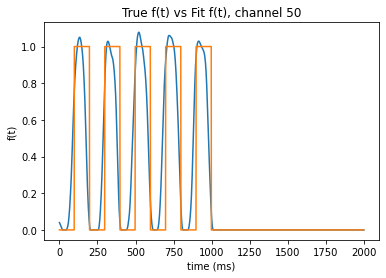

In [19]:
plt.plot(model.f_hat_[1,50])
plt.plot(F1_true[50])
plt.title('True f(t) vs Fit f(t), channel 50')
plt.xlabel('time (ms)')
plt.ylabel('f(t)')

In [21]:
x_rec = model.transform(x, len(t), t_step)

Text(0, 0.5, 'Channel')

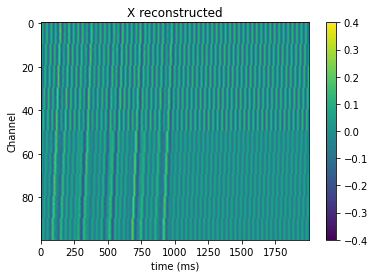

In [22]:
plt.imshow(x_rec, aspect='auto', vmin=-0.4, vmax=0.4)
plt.colorbar()
plt.title('X reconstructed')
plt.xlabel('time (ms)')
plt.ylabel('Channel')

Text(0, 0.5, 'Channel')

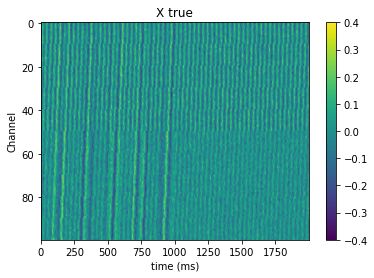

In [23]:
plt.imshow(x, aspect='auto', vmin=-0.4, vmax=0.4)
plt.colorbar()
plt.title('X true')
plt.xlabel('time (ms)')
plt.ylabel('Channel')